In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.model_selection import train_test_split

### Генерация данных

In [2]:
np.random.seed(0)
l = 500
n = 2
X1 = np.array([[-1,-1]]) + 0.5*np.random.randn(l, n)
X2 = np.array([[1,1]]) + 0.5*np.random.randn(l, n)

X = np.vstack([X1, X2])
y = np.hstack([[-1]*l, [1]*l])


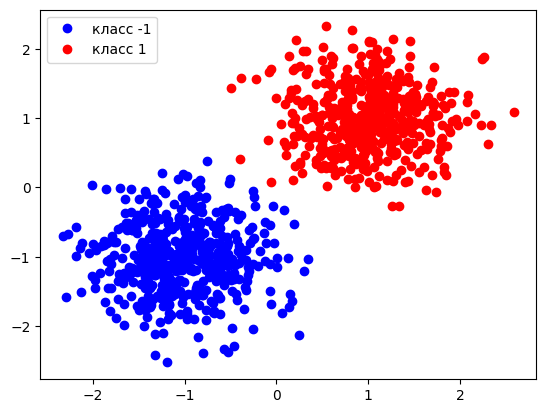

In [3]:
cols = ['blue', 'red']

# построение точек
for k in np.unique(y):
    if k == -1: col = cols[0]
    else: col = cols[1]
    plt.plot(X[y==k,0], X[y==k,1], 'o', label='класс {}'.format(k), color=col)

plt.legend(loc='best')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

### Метод PLA


\begin{align}
y(x_i) = sign(<w, x_i> + w_0)
\end{align}
Функция потерь
\begin{align}
L_i (w, w_0) = - y_i(<w, x_i> +w_0)
\end{align}

\begin{align}
Q (w,w_0) = \sum_{} {L_i(w, w_0)} = - \sum_{} {y_i(<w, x_i> +w_0)}
\end{align}
Правило обучения: добавить к $w, w_0$ для произвольного $ y_i \ne \hat{y_i}$
$$\left\{\begin{array}{}
  w^{(t+1)} = w^{(t)} + h*y_i* x_i  \\
  w_0^{(t+1)} = w_0^{(t)} + h*y_i\\
  \end{array}
  \right.
$$
где h - темп обучения



In [8]:
class Perceptron:
    def __init__(self, x, y, lr = 1, lamda = 0):
        self.length = len(x)
        self.x = x
        self.y = y
        self.lr = lr
        self.lamda = lamda
        self.w0 = 0
        self.w = np.zeros(len(self.x[0]))

    def predict(self, w, w0, x):
        y_predict = np.dot(x, w) + w0
        if y_predict >= 0: y_predict = 1
        else: y_predict = -1
        return y_predict

    def update(self, y_i, x_i):
        self.w += self.lr*y_i*x_i
        self.w0 += self.lr*y_i

    def train(self, epochs = 100):
        Finish = False
        count = 0
        while not Finish:
            count += 1
            err = 0
            yy = 0
            xx = np.zeros(len(self.x[0]))
            for i in range(self.length):
                x_i = self.x[i]
                y_i = self.y[i]
                # print(y_i, self.predict(self.w, self.w0, x_i), count - epochs)

                if self.predict(self.w, self.w0, x_i)!= y_i :
                    err += 1
                    yy = y_i
                    xx = x_i
            # Update last element
            self.update(yy, xx)

            if err == 0 or count >= epochs: Finish = True
            # print(self.w, self.w0)

        return self.w, self.w0


    def eval(self,X_test, y_test):
        count = 0
        samples = len(y_test)
        y_predict = np.zeros(len(y_test))
        for i in range(len(X_test)):
            x_i = X_test[i]
            y_i = y_test[i]
            y_predict[i] = self.predict(self.w, self.w0, x_i)
            if y_i * y_predict[i] == 1: count += 1
        score = count/samples * 100
        return y_predict, score
    def show_graph(self):
        cols = ['blue', 'red']

        # построение точек
        for k in np.unique(y_train):
            if k == -1: col = cols[0]
            else: col = cols[1]
            plt.plot(X_train[y_train==k,0], X_train[y_train==k,1], 'o', label='класс {}'.format(k), color=col)

        if self.w[1] != 0:
            b = - self.w0/self.w[1]
            k = - self.w[0]/self.w[1]
        else:
            pass
        x_axis = np.linspace(-1, 1)
        y_axis = k* x_axis + b
        plt.plot(x_axis, y_axis, linewidth=2)
        plt.legend(loc='best')
        plt.show()



In [12]:
model = Perceptron(X_train, y_train, lr = 0.5)
model.train(epochs = 1000)

(array([0.56511616, 1.05774768]), 0.0)

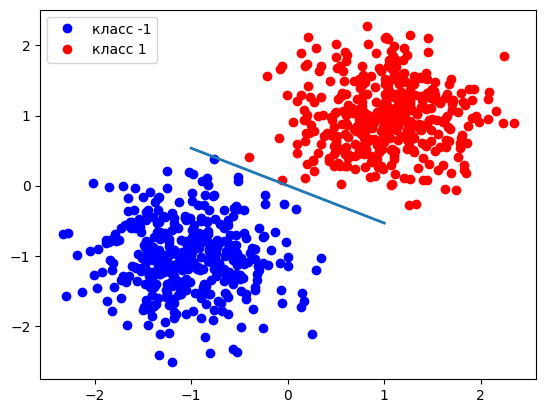

In [13]:
model.show_graph()


In [14]:
_ ,score = model.eval(X_test, y_test)
score

100.0

### SVM

обучающая выборка $X^l = (x_i, y_i)_{i = 1}^l$
Линейный классификатор
$$ a(w, x) = sign(<w, x> - w_0)$$

Разделяющая плоскость $$<w, x> = w_0$$
Функция потерь
$$ Q(w, w_0) = \sum_{i = 1}^l{[y_i(<w, x_i> -w_0) \le 0]}$$

**Оптимальная разделяющая плоскость** : максимально далеко отстояла от ближайших к ней точек обоих классов. То есть максимизация зазора между классами.
 
Пусть $ \underset{i= 1, 2,..l}{min}[y_i (<x_i, w> - w_0)] = 1$, тогда ширина полосы
$$ \frac{<(x_+, x_-), w>}{||w||} = \frac{2}{||w||} \rightarrow max$$

Наша задача
$$\left \{
\begin{array}{}
||w||^2 \rightarrow min \\
y_i(<w, x_i> - w_0) \ge 1 \\
\end{array}{}
\right.
$$
Обобщение задачи
$$\left \{
\begin{array}{}
\frac{1}{2} {||w||}^2 + C \sum_{i = 1}^l \xi_i \rightarrow \underset{w, w_0, \xi}{min} \\
y_i(<w. x_i> - w_0) \ge 1- \xi_i \\
\xi_i \ge 0 \\
\end{array}
\right. 
$$
**Двойственная задача**: 

Функция Лагранжа этой задачи
$$L =(w, w_0, \xi, \lambda, \eta) = 
\frac{1}{2}||w||^2 + C \sum_{i = 1}^l \xi_i - \sum_{i = 1}^l \lambda_i(M_i(w, w_0) - 1 +\xi_i) - \sum_{i = 1}^l \xi_i \eta_i = \\
= \frac{1}{2}||w||^2 - \sum_{i = 1}^l \lambda_i(M_i(w, w_0)  - 1) - \sum_{i = 1}^l \xi_i(\lambda_i + \eta_i -C)
$$
По теореме Круша-Куна-Таккера эта задача эквивалентна двойственной задаче поиска седловой точки функции Лагранжа
$$ \left \{
    \begin{array}{}
    L(w, w_0, \xi, \lambda, \eta)  \rightarrow \underset {w, w_0, \xi}{min} \underset{\lambda, \eta }{max} \\
    \xi_i \ge 0,  \lambda_i \ge 0, \eta_i \ge 0 \\
    \lambda_i =0   &либо&  M_i(w, w_0) = 1 - \xi_i \\
    \eta_i= 0 &либо& \xi_i = 0
    \end{array}
    \right.
$$
Условия седловой точки функции Лагранжа
$$ \frac{dL}{dw} = w - \sum_{} \lambda_i y_i x_i = 0 \rightarrow w = \sum_{} \lambda_i y_i x_i $$
$$ \frac{dL}{dw_0} =- \sum_{} \lambda_i y_i  = 0 \rightarrow \sum_{} \lambda_i y_i =0 $$
$$ \frac{dL}{d\xi_i} = -\lambda_i - \eta_i + C = 0 \rightarrow \eta_i + \lambda_i = C$$
Тогда решение двойственной задачи
$$(*)\left \{
    \begin{array}{}
    L(\lambda ) = -\sum_{}\lambda_i + \frac{1}{2} \sum_{i} \sum_{j} \lambda_i \lambda_j y_i y_j <x_i, x_j> \rightarrow \underset{\lambda}{min}\\
    0 \le \lambda_i \le C\\
    \sum_{i} \lambda_i y_i = 0 
    \end{array}
    \right.
$$

Для определения $w_0$ взять опорные граничные векторы $x_i$ и $$w_0 = med(<w, x_i> - y_i : \lambda_i >0, M_i = 1)$$
Нужно найти оптимальные значения $\lambda_i$, которые минимизируют $L(\lambda )$. Градиент функции $L(\lambda)$
$$ \frac{dL}{d\lambda_i} = -1 + y_i \sum_{j = 1}^l \lambda_j y_j <x_i, x_j> $$
Итерационное обновление:
$$\lambda_i = \lambda_i + h*(1 - y_i \sum_{j = 1}^l \lambda_j y_j <x_i, x_j>)$$

In [ ]:
import numpy as np

def dual_problem_solver(X, y, C):
    N = X.shape[0]
    alpha = np.zeros(N)
    tol = 1e-5  # Точность для условия Каруша-Куна-Таккера
    
    # Вычисляем матрицу ядра (можно использовать, например, радиальное базисное ядро)
    K = np.dot(X, X.T)
    
    iterations = 0
    while True:
        alpha_prev = np.copy(alpha)
        for i in range(N):
            # Вычисляем значение градиента для i-го множителя Лагранжа
            gradient = 1 - y[i] * np.sum(alpha * y * K[i, :]) 
            
            # Обновляем i-й множитель Лагранжа
            alpha[i] = alpha[i] + gradient / K[i, i]
            
            # Применяем условие Каруша-Куна-Таккера
            alpha[i] = max(0, min(C, alpha[i]))
        
        # Проверяем условие сходимости
        diff = np.linalg.norm(alpha - alpha_prev)
        if diff < tol:
            break
        
        iterations += 1
        if iterations >= 10000:
            break  # Защита от зацикливания
    
    return alpha

def svm_fit(X, y, alpha):
    # Находим оптимальные параметры гиперплоскости
    # в зависимости от найденных множителей Лагранжа
    
    # Находим ненулевые множители Лагранжа
    support_vectors_idx = alpha > 1e-5
    alpha_s = alpha[support_vectors_idx]
    X_s = X[support_vectors_idx]
    y_s = y[support_vectors_idx]
    
    # Вычисляем вектор весов гиперплоскости
    w = np.sum(alpha_s * y_s * X_s, axis=0)
    
    # Вычисляем смещение гиперплоскости
    b = np.mean(y_s - np.dot(X_s, w))
    
    return w, b

# Пример использования
# Предполагаем, что у нас есть матрица данных X и вектор меток классов y
C = 1.0  # Параметр регуляризации

# Решаем двойственную задачу для определения множителей Лагранжа
alpha = dual_problem_solver(X, y, C)

# Вычисляем параметры гиперплоскости разделяющей поверхности
w, b = svm_fit(X, y, alpha)


In [ ]:
class SVM:
    def __init__(self, lr= 0.001, C = 1, epochs=1000):
        self.lr = lr
        self.C = C
        self.epochs= epochs
        self.w= None
        self.w0 = 0
    def train(self, X, y):
        self.w = np.zeros(len(X[0]))

        for _ in range(self.epochs):
            for i, x_i in enumerate(X):
                condition = y[i] * (np.dot(x_i, self.w) + self.w0) >=1
                if condition:
                    self.w +=  -self.lr * self.w
                else:
                    self.w +=  -self.lr * self.w + self.lr * ( self.C *y[i] * x_i)
                    self.w0 += self.lr *self.C * y[i]
        return self.w, self.w0
    def eval(self,X_test, y_test):
        count = 0
        samples = len(y_test)
        y_predict = np.zeros(len(y_test))
        for i in range(len(X_test)):
            x_i = X_test[i]
            y_i = y_test[i]
            y_predict[i] = np.sign(np.dot(self.w, x_i) + self.w0)
            if y_i * y_predict[i] == 1: count += 1
        score = count/samples * 100
        return y_predict, score


In [ ]:
def visualize_svm(w, w0):
    def get_hyperplane_value(x, w, w0, offset):
        return (-w[0] * x + w0 + offset) / w[1]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    for k in np.unique(y_train):
        if k == -1: col = cols[0]
        else: col = cols[1]
        plt.plot(X_train[y_train==k,0], X_train[y_train==k,1], 'o', label='класс {}'.format(k), color=col)
    # plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, w0, 0)
    x1_2 = get_hyperplane_value(x0_2, w, w0, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, w0, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, w0, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, w0, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, w0, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()




In [ ]:
model= SVM(C= 1000)
w, w0 = model.train(X_train, y_train)
w, w0

(array([2.60517462, 2.72182237]), 0.0)

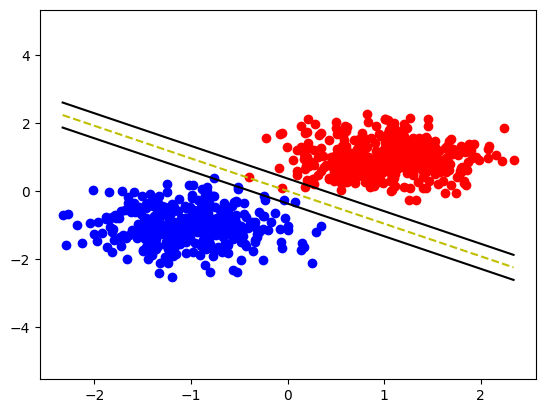

In [ ]:
visualize_svm(w, w0)

In [ ]:
_, score = model.eval(X_test, y_test)
score

100.0

### Квадратичное программирование 


Задачи минимизации расстояния от точки M до выпуклой области
$$ x = \underset{x}{argmin} ||x- M||^2$$
при условии
$$ Ax \preceq b$$
$\overline{x} = x -M ; \overline{b} = b + A*M $. То эквивалентная задача 
$$\left\{
    \begin{array}{}
    \overline{x} = \underset{\overline{x}}{argmin} ||\overline{x}||^2\\
    A \overline{x} \preceq \overline{b}\\
    \end{array}
    \right.
$$
Нам интересна только граница этой области $$Ax = b$$
Лагранжиан 
$$ \left \{
    \begin{array}{}

    L(\lambda, \overline{x}) = \frac{1}{2} \overline{x}^T \overline{x} + \lambda^T (A \overline{x} - \overline{b})\\
    A \overline{x} = \overline{b}\\
    \end{array}
    \right.
$$
при условии $\lambda_i \ge 0$

Решение 
$$ \left \{
    \begin{array}{}
    \frac{dL}{dx} = \overline{x}^*+ A^T \lambda^* = 0\\
    A\overline{x}^* = \overline{b}\\
    \end{array}
    \right. 
    \Rightarrow
    \left(
    \begin{array}{}
    I & A^T\\
    A & O\\
    \end{array}
    \right)
    \left(
    \begin{array}{}
    \overline{x}^*\\
    \lambda^*\\
    \end{array}
    \right)
    = \left(
    \begin{array}{}
    0\\
    \overline{b}\\
    \end{array}
    \right)
$$



Решить СЛАУ Ax = b
Нужно разложить 
$$
A = LU
$$
$$
L = \left( 
    \begin{array}{}
    1 & 0 & 0 & ..\\
    l_{21} & 1 & 0 & .. \\
    l_{31} & l_{32} & 1 & ..\\
    l_{n1} & l_{n2} & .. & 1 \\
    \end{array}
    \right)

U = \left( 
    \begin{array}{}
    u_{11} & u_{12} & u_{13} & ..\\
    0 & u_{22} & u_{23} & .. \\
    0 & 0 & u_{33} & ..\\
    0 & 0 & .. & u_{nn} \\
    \end{array}
    \right)
$$
Тогда $$a_{ij }= \sum_{k = 1}^nl_{ik}u_{kj} = \left \{
    \begin{array}{}
    \sum_{k=1}^il_{ik}u_{kj} = \sum_{k = 1}^{i-1}l_{ik}u_{kj} + u_{ij} & if & i \le j\\
    \sum_{k = 1}^j l_{ik}u_{kj} = \sum_{k = 1}^{j -1}l_{ik}u_{kj} + l_{ij} * u_{jj} & if & i >j
    \end{array}{}
    \right.$$
Отсюда, получил алгоритм

for i = 1:n

----for j = 1:n

--------$u_{ij} = a_{ij} - \sum_{k = 1}^i l_{ik}u_{kj} $ if  $i \le j$

--------$l_{ij} = \frac{a_{ij} - \sum_{k = 1}^j l_{ik}u_{kj} }{u_{jj}} $ if $i > j$


In [61]:
def LU(A):
    
    n = len(A[0])
    L = np.zeros((n,n))
    U = np.zeros((n,n))
    for i in range(n): L[i][i] = 1
    for i in range(n):
        for j in range(n):
            if i <= j :
                r = 0
                for k in range(i):
                    r += L[i][k] * U[k][j]
                U[i][j] = A[i][j] - r
            if i > j:
                r = 0
                for k in range(j):
                    lu += L[i][k] * U[k][j]
                L[i][j] = (A[i][j] - r) / U[j][j]
    return L, U
def result_Clau(A, b):
    n = len(b)
    L, U = LU(A) 
    y = np.zeros((n, 1))
    y[0] = b[0]
    for i in range(1, n):
        r = 0
        for k in range(i):
            r += L[i][k] * y[k]
        y[i] = b[i] - r
        
    x = np.zeros((n, 1))
    x[n -1] = y[n-1]/ U[n-1][n-1]
    for i in range(n - 2, -1, -1):
        r = 0
        for k in range(i, n):
            r += U[i][k] * x[k]
        x[i] = (y[i] - r)/ U[i][i]
    return y, x
                    

In [64]:
A = [[1, 2],[3,4]]
b = np.array([[2],[3]]) 

In [69]:
A_inv = np.linalg.inv(A)
x1 = A_inv.dot(b)
x1

array([[-1. ],
       [ 1.5]])

In [70]:
_, x = result_Clau(A, b)
x

array([[-1. ],
       [ 1.5]])

Построить выпуклую оболочку точек на плоскости - алгоритм Джарвиса


In [74]:
import math
x = math.atan(1)
x

0.7853981633974483

In [76]:
A = [1, 2,3]
A.remove(3)
A

[1, 2]

In [291]:
math.atan(1)

0.7853981633974483

In [74]:
import math
def angle(A, B):
    if B[0] -A[0] == 0:
        ang = math.pi / 2 
    else: ang = math.atan((B[1] - A[1])/(B[0] - A[0]) )
    
    if B[0] - A[0] < 0: ang += math.pi
    # -Pi/2 <ang < 3Pi/2
    
    if ang <0 : ang += 2* math.pi #  0 < ang < 2Pi
    
    return ang

def rotation_angle(p_prev, p_now, P):
    ang1 = angle(p_prev, p_now)
    ang2 = angle(p_now, P)
    if ang2 >= ang1: aa = ang2 - ang1
    else: aa = 7
    return aa

In [86]:
import math
def Jarvis(X):
    Indexs = list(range(len(X)))
    P = []
    
    p0 = X[0]
    for A in X:
        if p0[1] > A[1] or (p0[1] == A[1] and p0[0] < A[0]): p0 = A
    P.append(p0)
    print(P, Indexs)

    if X[0][0] != p0[0]: p1 = X[0]
    else: p1 = X[1]
    
    # Find p1
    min = 2* math.pi 
    for i in Indexs:
        ind = 0
        if A == p1 : continue
        A = X[i] 
        roto = rotation_angle([p0[0] - 1,  p0[1]], p0, A)
        if min > roto: 
            min = roto
            p1 = A
            ind = i        
    P.append(p1)
    Indexs.remove(ind)
    
    print(P, Indexs)
    
    Finish = False
    while Finish == False:
        p_now = P[-1]
        p_prev = P[-2]
        ind = Indexs[0]
        min = 2* math.pi 
        
        for i in Indexs:
            if i == ind: continue
            A = X[i]
            roto = rotation_angle(p_prev, p_now, A)
            # print('min', min, 'rotot', roto)
            
            # print(roto)
            if min > roto: 
                min = roto
                p_next = A
                ind = i
            if min == roto :
                len1 = math.sqrt((A[0]- p_now[0])* (A[0]- p_now[0]) + (A[1]- p_now[1])* (A[1]- p_now[1]))
                len2 = math.sqrt((p_next[0]- p_now[0])* (p_next[0]- p_now[0]) + (p_next[1]- p_now[1])* (p_next[1]- p_now[1]))
                if len1 > len2: 
                    ind  = i
                    p_next = A
        print(min)
                
        # print(p_next)
        Indexs.remove(ind)
        print(P, Indexs)
        P.append(p_next)
        if p_next == p0: Finish = True
    return P

    

In [68]:
import numpy as np
np.random.seed(0)
l = 10
n = 2
X = np.array([[-1,-1]]) + 0.5 *np.random.randn(l, n)


In [87]:
P = Jarvis(X.tolist())

[[-0.06622100492501626, -1.4886389399382054]] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[[-0.06622100492501626, -1.4886389399382054], [-0.11797382701616799, -0.7999213958163883]] [1, 2, 3, 4, 5, 6, 7, 8, 9]
0.9189365281999251
[[-0.06622100492501626, -1.4886389399382054], [-0.11797382701616799, -0.7999213958163883]] [1, 2, 3, 4, 6, 7, 8, 9]
1.9150272207538408
[[-0.06622100492501626, -1.4886389399382054], [-0.11797382701616799, -0.7999213958163883], [-0.927978214419561, -0.27286324651851246]] [1, 2, 3, 6, 7, 8, 9]
0.5506158268981576
[[-0.06622100492501626, -1.4886389399382054], [-0.11797382701616799, -0.7999213958163883], [-0.927978214419561, -0.27286324651851246], [-1.051609425896779, -0.7947007490308138]] [1, 2, 3, 6, 7, 8]
1.173729066430198
[[-0.06622100492501626, -1.4886389399382054], [-0.11797382701616799, -0.7999213958163883], [-0.927978214419561, -0.27286324651851246], [-1.051609425896779, -0.7947007490308138], [-0.8434661491745493, -1.4270478696508624]] [1, 3, 6, 7, 8]


In [82]:
P= np.array(P)

In [85]:
P

array([[-0.066221  , -1.48863894],
       [-0.11797383, -0.7999214 ],
       [-0.92797821, -0.27286325],
       [-1.05160943, -0.79470075],
       [-0.84346615, -1.42704787],
       [-0.066221  , -1.48863894]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


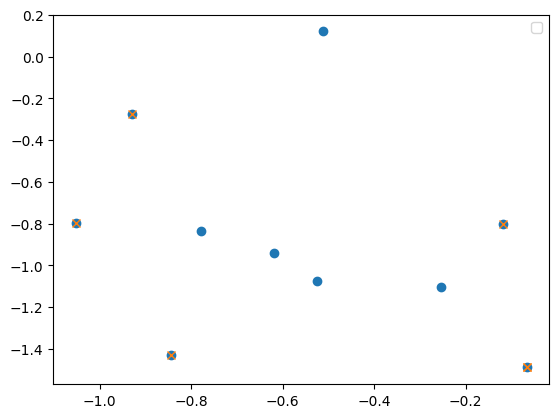

In [83]:
import matplotlib.pyplot as plt

# построение точек
plt.plot(X[:,0], X[:,1], 'o')
plt.plot(P[:,0], P[:,1], 'x')

plt.legend(loc='best')
plt.show()